Instructions for updating:
non-resource variables are not supported in the long term
Train Epoch:1  Step:20  loss:0.131197810
Train Epoch:1  Step:40  loss:0.366075784
Train Epoch:1  Step:60  loss:0.004311353
Train Epoch:1  Step:80  loss:0.002796816
Train Epoch:1  Step:100  loss:0.090841062
Train Epoch:1  Step:120  loss:0.016047737
Train Epoch:1  Step:140  loss:0.350193202
Train Epoch:1  Step:160  loss:0.004568456
Train Epoch:1  Step:180  loss:0.041128483
Train Epoch:1  Step:200  loss:0.114690110
Train Epoch:1  Step:220  loss:0.061894815
Train Epoch:1  Step:240  loss:0.078019530
Train Epoch:1  Step:260  loss:0.006248046
Train Epoch:1  Step:280  loss:0.053734150
Train Epoch:1  Step:300  loss:0.000083192
Train Epoch:1  Step:320  loss:0.049296971
Train Epoch:1  Step:340  loss:0.039168112
Train Epoch:1  Step:360  loss:0.026956417
Train Epoch:1  Step:380  loss:0.123416550
Train Epoch:1  Step:400  loss:0.195363924
Train Epoch:1  Step:420  loss:0.151460096
Train Epoch:1  Step:440  loss:0.00488

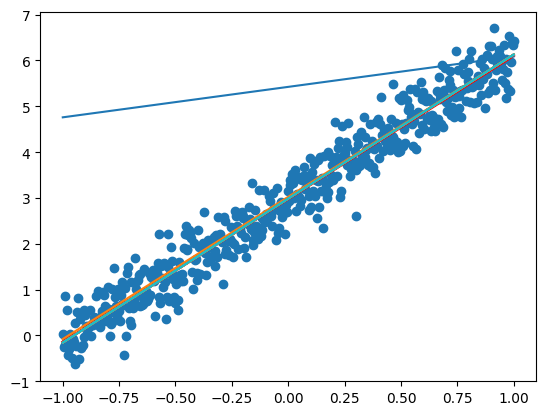

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt   #载入matplotlib库
import numpy as np    #载入numpy
import tensorflow.compat.v1 as tf
from IPython.display import Image

tf.disable_v2_behavior()

#清除default_graph和不断增加的节点
tf.reset_default_graph()

#路径
logdir = "D:/log"



#import tensorflow as tf     #载入tensorflow,tensorflow2.0不支持placeholder
np.random.seed(5)   #设置伪随机种子，种子相同每次生成的随机序列也相同

# 区间变换,[0,100]化为[-1,1]
def Convert(data,Min,Max,size):
    # data：需要变换的数据或矩阵
    # Min：最小值        
    # Max：最大值
    #size:样本个数
    data = np.array(data)
    Size = size
    w = -2/(Min - Max)
    b = (Min + Max)/(Min - Max)
    for i in range(Size):
            data[i] = data[i]*w + b
    return data



#生成 x_data，值为 [0, 100]之间500个等差数列数据集合作为样本特征
x_data = np.linspace(0,100,500)
x_data = Convert(x_data,0,100,500)


#根据目标线性方程 y=3.1234*x+2.98，生成相应的标签集合 y_data，噪声最大振幅0.4
y_data = 3.1234 * x_data + 2.98 + np.random.randn(*x_data.shape) *0.4

#画出随机生成数据的散点图
plt.scatter(x_data,y_data)

#画出通过学习得到的目标线性函数 y=3.1234*x+2.98
plt.plot(x_data,3.1234 * x_data + 2.98,color = "red", linewidth = 2)

#定义数据的占位符,x为特征值，y为标签值
x = tf.placeholder("float", name = "x")
y = tf.placeholder("float",name ="y")

#定义模型函数
def model(x,w,b):
    return tf.multiply(x,w) + b

#定义模型结构：

#构建线性函数的斜率，变量w
w = tf.Variable(1.0,name="w0")
#构建线性函数的截距，变量b
b = tf.Variable(0.0,name="b0")

#pred是预测值，前向计算
pred = model(x,w,b)

#设置训练参数10轮，每训练20个样本显示损失值
train_epochs = 10
step = 0
display_step = 20   #显示的步数
loss_list = []   #初始化空列表，用于保存损失值

learning_rate = 0.05   #学习率

#采用均方差作为损失函数
loss_function = tf.reduce_mean(tf.square(y-pred))

#梯度下降优化器
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss_function)

#声明回话
sess = tf.Session()

#变量初始化
init = tf.global_variables_initializer()
sess.run(init)


#开始进行迭代训练
for epoch in range(train_epochs):
    for xs,ys in zip(x_data,y_data):
        _,loss = sess.run([optimizer,loss_function],feed_dict = {x:xs , y:ys})
        loss_list.append(loss)     #将损失函数值增加到列表末端
        step += 1     #步长加1
        
        
        
        if step % display_step == 0:
            print("Train Epoch:{0:d}  Step:{1:d}  loss:{2:.9f}".format(epoch+1,step,loss))
            
    b0temp = b.eval(session = sess)
    w0temp = w.eval(session = sess)
    plt.plot(x_data,w0temp*x_data +b0temp)    #画预测图
    
print("w:",sess.run(w))
print("b:",sess.run(b))


#通过训练出的模型预测 x=5.79 时 y 的值
x_test = 5.79

predict = sess.run(pred,feed_dict={x:x_test})
print("预测值：{:.9f}".format(predict))

target = 3.1234 * x_test + 2.98 
print("目标值：{:.9f}".format(target))


